In [1]:
import pennylane as qml
import numpy as np

In [24]:
dev = qml.device("default.qubit", wires=4, shots=1)


@qml.qnode(dev)
def query_qrom(address=None):

    # qml.Hadamard(wires=0)
    # qml.Hadamard(wires=1)
    # qml.Hadamard(wires=2)

    for ind, val in enumerate(address):
        if val == "1":
            qml.PauliX(wires=ind)

    qml.MultiControlledX(control_wires=[2], wires=[3])
    qml.MultiControlledX(control_wires=[1], wires=[3])
    qml.MultiControlledX(control_wires=[1, 2], wires=[3])
    qml.MultiControlledX(control_wires=[0], wires=[3])
    qml.MultiControlledX(control_wires=[0, 2], wires=[3])
    qml.MultiControlledX(control_wires=[0, 1], wires=[3])
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=[3])

    # qml.Hadamard(wires=0)
    # qml.Hadamard(wires=1)
    # qml.Hadamard(wires=2)

    return qml.sample(wires=3)


print(query_qrom("000"))
print(query_qrom("001"))
print(query_qrom("010"))
print(query_qrom("011"))
print(query_qrom("100"))
print(query_qrom("101"))
print(query_qrom("110"))
print(query_qrom("111"))

0
1
1
1
1
1
1
1


(<Figure size 1300x500 with 1 Axes>, <Axes: >)

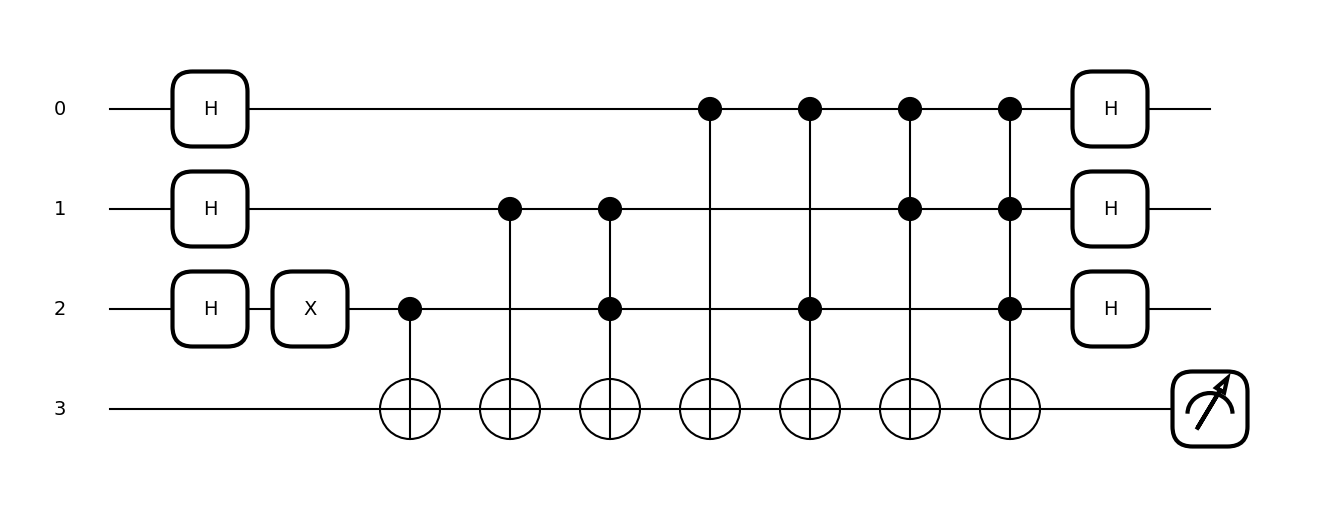

In [16]:
qml.draw_mpl(query_qrom)("001")